<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-letadylka-prochazka-belohlavek/blob/main/LatitudeLongitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [2]:
import re
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
char_points = '/content/drive/My Drive/CHARACTERISTIC_POINTS.txt'

coordinates_text = []
k = 0
amount_to_read = 1000
coordinate_pattern = r'\d{6}[NS]\d{7}[EW]'
with open(char_points, 'r') as f:
    for line in f:
      matches = re.findall(coordinate_pattern, line)
      if matches != []:
        coordinates_text.append(matches[0])
        k += 1
      if k >= amount_to_read:
        break

number_of_points = len(coordinates_text)
print(number_of_points)

1000


In [5]:
print(coordinates_text)

['491004N0163011E', '490805N0165303E', '501524N0124306E', '500855N0130649E', '493607N0175732E', '494703N0181512E', '500227N0140127E', '501144N0140349E', '501039N0142846E', '500024N0142729E', '501224N0142812E', '501141N0143208E', '501025N0144213E', '490647N0173003E', '500812N0143903E', '501716N0143233E', '501244N0143548E', '501521N0140952E', '500753N0145319E', '500954N0144146E', '501402N0143849E', '501040N0143725E', '500936N0144332E', '501220N0142736E', '501432N0143043E', '501804N0142735E', '502601N0140816E', '501717N0150722E', '500511N0125711E', '490323N0164911E', '490228N0165935E', '490147N0170706E', '490825N0162521E', '490952N0162236E', '490735N0155414E', '491915N0160435E', '492306N0155244E', '490927N0155023E', '491033N0162118E', '490511N0155916E', '495721N0153258E', '494312N0154725E', '493652N0153949E', '494452N0152008E', '495832N0153118E', '494209N0154609E', '493854N0153358E', '500110N0153230E', '500026N0155609E', '500059N0153831E', '495730N0153816E', '495658N0155458E', '495646N016

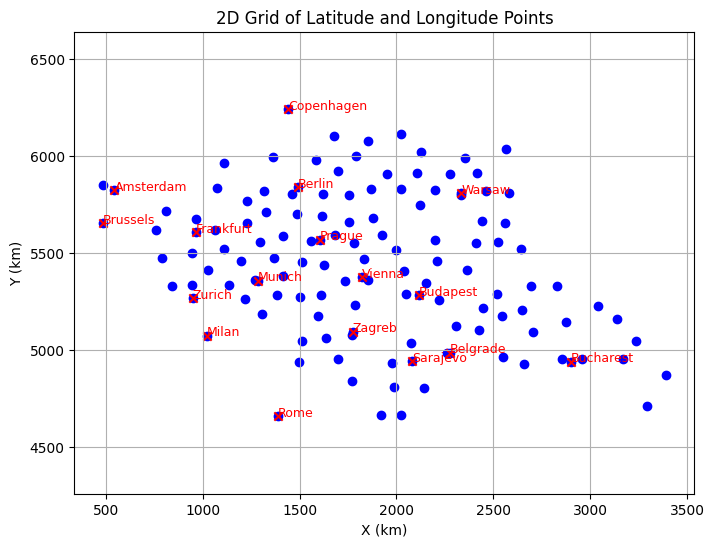

In [32]:
import math
import re

# Constants for Earth's radius (in kilometers)
EARTH_RADIUS = 6371  # Radius in kilometers
MIN_DISTANCE_THRESHOLD = 100  # Minimum distance threshold in km

major_cities_dms = {
    "Berlin": "523006N0132430E",
    "Rome": "415316N0122956E",
    "Vienna": "482012N0162248E",
    "Warsaw": "521329N0210007E",
    "Prague": "500431N0142616E",
    "Budapest": "472959N0190224E",
    "Amsterdam": "522210N0045412E",
    "Munich": "481008N0113420E",
    "Zurich": "472234N0083244E",
    "Bucharest": "442521N0260527E",
    "Zagreb": "454810N0155748E",
    "Milan": "453727N0091116E",
    "Frankfurt": "502458N0084044E",
    "Brussels": "505037N0042108E",
    "Belgrade": "445012N0202823E",
    "Copenhagen": "556761N125683E",
    "Sarajevo": "438563N184131E"
}

def dms_to_decimal(dms_str):
    # Regex pattern to extract DMS values
    pattern = r'(\d{2,3})(\d{2})(\d{2})([NSEW])'
    match = re.match(pattern, dms_str)

    if not match:
        raise ValueError(f"Invalid DMS format: {dms_str}")

    degrees = int(match.group(1))
    minutes = int(match.group(2))
    seconds = int(match.group(3))
    direction = match.group(4)

    # Convert DMS to decimal degrees
    decimal_degrees = degrees + minutes / 60 + seconds / 3600

    # Apply the direction (negative for S and W)
    if direction in 'SW':
        decimal_degrees = -decimal_degrees

    return decimal_degrees

def latlon_to_xy(coords, lat_origin=0, lon_origin=0):
    xy_coords = []

    for coord in coords:
        lat_dms = coord[:7]  # First 7 characters for latitude
        lon_dms = coord[7:]  # Remaining characters for longitude

        lat = dms_to_decimal(lat_dms)
        lon = dms_to_decimal(lon_dms)

        # Convert latitude and longitude to radians
        lat_rad = math.radians(lat)
        lon_rad = math.radians(lon)
        lat_origin_rad = math.radians(lat_origin)
        lon_origin_rad = math.radians(lon_origin)

        # Apply equirectangular projection
        x = EARTH_RADIUS * (lon_rad - lon_origin_rad) * math.cos(lat_origin_rad)
        y = EARTH_RADIUS * (lat_rad - lat_origin_rad)

        xy_coords.append((x, y))

    return xy_coords

def cities_to_xy(city_coords_dms, lat_origin=0, lon_origin=0):
    xy_coords = []
    for dms_str in city_coords_dms.values():
        lat_dms = dms_str[:7]
        lon_dms = dms_str[7:]

        lat = dms_to_decimal(lat_dms)
        lon = dms_to_decimal(lon_dms)

        lat_rad = math.radians(lat)
        lon_rad = math.radians(lon)
        lat_origin_rad = math.radians(lat_origin)
        lon_origin_rad = math.radians(lon_origin)

        x = EARTH_RADIUS * (lon_rad - lon_origin_rad) * math.cos(lat_origin_rad)
        y = EARTH_RADIUS * (lat_rad - lat_origin_rad)

        xy_coords.append((x, y))

    return xy_coords

def filter_close_points(xy_coords, threshold=MIN_DISTANCE_THRESHOLD):
  sparse_coords = []
  for coord in xy_coords:
    if all(math.dist(coord, other) >= threshold for other in sparse_coords):
      sparse_coords.append(coord)
  return sparse_coords

def plot_coordinates(xy_coords, city_indices, labels):
    plt.figure(figsize=(8, 6))

    # Extract x and y coordinates
    x_vals = [coord[0] for coord in xy_coords]
    y_vals = [coord[1] for coord in xy_coords]

    # Create the scatter plot
    plt.scatter(x_vals, y_vals, color='blue', marker='o')

    ##Annotate each point with its label
    #for i, label in enumerate(labels):
       #plt.text(x_vals[i], y_vals[i], label, fontsize=12, ha='right')
    for i, idx in enumerate(city_indices):
        plt.scatter(x_vals[idx], y_vals[idx], color='red', marker='x', label="Major Cities" if i == 0 else "")
        plt.text(x_vals[idx], y_vals[idx], city_labels[i], fontsize=9, ha='left', color='red')

    # Add labels and grid
    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.title("2D Grid of Latitude and Longitude Points")
    plt.grid(True)
    plt.axis('equal')  # Ensure x and y axis have equal scaling

    # Show plot
    plt.show()

# Converting the coordinates to 2D grid
xy_points = latlon_to_xy(coordinates_text)

sparse_points = filter_close_points(xy_points)

# Labels for each point
sparse_labels = [f"Point {i+1}" for i in range(len(sparse_points))]

city_points = cities_to_xy(major_cities_dms)

# Labels for each point
city_labels = list(major_cities_dms.keys())

sparse_points.extend(city_points)
sparse_labels.extend(city_labels)

city_indices = list(range(len(sparse_points) - len(city_points), len(sparse_points)))

# Plot the points
plot_coordinates(sparse_points, city_indices, sparse_labels)


In [34]:
import json
import os

# Load sparse_points from the JSON file
# Define directory and file path
dir_path = '/content/drive/My Drive/'
file_path = dir_path + 'sparse_points.json'

# Ensure the directory exists
os.makedirs(dir_path, exist_ok=True)  # Creates the directory if it doesn't exist

# Save sparse_points to a JSON file
with open(file_path, 'w') as f:
    json.dump([list(point) for point in sparse_points], f)  # Convert tuples to lists for JSON compatibility

print(f"Sparse points saved to {file_path}")

Sparse points saved to /content/drive/My Drive/sparse_points.json
